In [ ]:
import numpy as np
import pandas as pd

from google.colab import auth
import gspread
from google.auth import default

import matplotlib.pyplot as plt

#from google.colab import drive

In [ ]:
#drive.mount('/gdrive')
#%cd /gdrive
#!ls -ltr MyDrive

Mounted at /gdrive


In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1RE_Vkl3gpPReAVJpKJdlFtihAnen9eUb7dkhfffET-Q/')
worksheet

<Spreadsheet 'Bolão do MMaldade - Copa do Mundo' id:1RE_Vkl3gpPReAVJpKJdlFtihAnen9eUb7dkhfffET-Q>

In [ ]:
df = pd.DataFrame()
for index in range(3, 100):
    sheet = worksheet.get_worksheet(index)
    if sheet is None:
        print(index)
        break
    #print(sheet)
    nome = sheet.title
    #print('======')
    rows = sheet.get_all_values()
    cols = rows[0]
    df_temp = pd.DataFrame.from_records(rows[1:], columns=cols)
    df_temp = df_temp[['Nº jogo', 'Placar 1', 'Placar 2', 'Time 1', 'Time 2']]
    df_temp['nome'] = nome

    df = pd.concat([df, df_temp], axis=0)

print(df.sample(10))

23
   Nº jogo Placar 1 Placar 2     Time 1          Time 2             nome
23      24        1        1  Argentina          México       Alex Keila
20      21        0        0    Tunísia       Austrália    Bruno Crispim
13      14        3        0    Uruguai   Coreia do Sul             Malu
12      13        0        1      Suíça        Camarões     Leandro Higa
4        5        3        0  Argentina  Arábia Saudita    Letícia Deves
11      12        2        0    Bélgica          Canadá  Beatriz Coppola
15      16        2        1     Brasil          Sérvia     Gustavo Hott
36      37        1        3    Tunísia          França    Thiago Campos
27      28        0        0    Espanha        Alemanha      João Tarifa
27      28        1        1    Espanha        Alemanha             Malu


In [ ]:
df['Placar 2'].unique()

array(['2', '0', '1', '3', '', '4', '5'], dtype=object)

In [ ]:
df = df[df['Placar 1'] != '']

In [ ]:
df['Placar 1'] = df['Placar 1'].astype(int)
df['Placar 2'] = df['Placar 2'].astype(int)
df['Nº jogo'] = df['Nº jogo'].astype(int)

In [ ]:
df_resumo = df.groupby(by=['Nº jogo', 'Time 1', 'Time 2'], as_index=False).agg({
    'Placar 1': ['count', 'min', 'max', 'mean', 'median', 'std', 'sum'],
    'Placar 2': ['min', 'max', 'mean', 'median', 'std', 'sum']
})
df_resumo.columns = df_resumo.columns.droplevel(0)
df_resumo.columns = ['n_jogo', 'time_1', 'time_2', 'qtde_palpites',
                     'min_placar_1', 'max_placar_1', 'media_placar_1', 'mediana_placar_1', 'std_placar_1', 'soma_placar_1',
                     'min_placar_2', 'max_placar_2', 'media_placar_2', 'mediana_placar_2', 'std_placar_2', 'soma_placar_2'
                     ]
df_resumo

,n_jogo,time_1,time_2,qtde_palpites,min_placar_1,max_placar_1,media_placar_1,mediana_placar_1,std_placar_1,soma_placar_1,min_placar_2,max_placar_2,media_placar_2,mediana_placar_2,std_placar_2,soma_placar_2
0,1,Catar,Equador,19,0,2,0.789474,1.0,0.713283,15,0,3,1.473684,2.0,0.772328,28
1,2,Inglaterra,Irã,19,0,4,2.421053,3.0,1.017393,46,0,2,0.315789,0.0,0.582393,6
2,3,Senegal,Holanda,19,0,1,0.684211,1.0,0.477567,13,0,3,1.947368,2.0,0.779864,37
3,4,Estados Unidos,Gales,19,1,2,1.421053,1.0,0.507257,27,0,2,0.842105,1.0,0.501460,16
4,5,Argentina,Arábia Saudita,19,2,6,2.947368,3.0,0.970320,56,0,0,0.000000,0.0,0.000000,0
5,6,Dinamarca,Tunísia,19,0,3,1.315789,1.0,0.820070,25,0,1,0.526316,1.0,0.512989,10
6,7,México,Polônia,19,0,3,1.578947,2.0,0.837708,30,0,2,1.105263,1.0,0.809303,21
7,8,França,Austrália,19,0,4,2.210526,2.0,1.031662,42,0,2,0.578947,1.0,0.606977,11
8,9,Marrocos,Croácia,19,0,1,0.473684,0.0,0.512989,9,0,3,1.526316,2.0,0.696692,29
9,10,Alemanha,Japão,19,1,4,2.315789,2.0,0.945905,44,0,2,0.578947,0.0,0.692483,11


In [ ]:
df_resumo.head()

,n_jogo,time_1,time_2,qtde_palpites,min_placar_1,max_placar_1,media_placar_1,mediana_placar_1,std_placar_1,soma_placar_1,min_placar_2,max_placar_2,media_placar_2,mediana_placar_2,std_placar_2,soma_placar_2
0,1,Catar,Equador,19,0,2,0.789474,1.0,0.713283,15,0,3,1.473684,2.0,0.772328,28
1,2,Inglaterra,Irã,19,0,4,2.421053,3.0,1.017393,46,0,2,0.315789,0.0,0.582393,6
2,3,Senegal,Holanda,19,0,1,0.684211,1.0,0.477567,13,0,3,1.947368,2.0,0.779864,37
3,4,Estados Unidos,Gales,19,1,2,1.421053,1.0,0.507257,27,0,2,0.842105,1.0,0.501460,16
4,5,Argentina,Arábia Saudita,19,2,6,2.947368,3.0,0.970320,56,0,0,0.000000,0.0,0.000000,0


In [ ]:
cols = [
    'n_jogo', 'time_1',
    'min_placar_1', 'max_placar_1',
    'media_placar_1', 'mediana_placar_1',
    'std_placar_1', 'soma_placar_1'
]
df_placar_1 = df_resumo[cols]
df_placar_1['time_1_ou_2'] = 1

cols = [
    'n_jogo', 'time_2',
    'min_placar_2', 'max_placar_2',
    'media_placar_2', 'mediana_placar_2',
    'std_placar_2', 'soma_placar_2'
]
df_placar_2 = df_resumo[cols]
df_placar_2['time_1_ou_2'] = 2

cols = [
    'n_jogo', 'time',
    'min_placar', 'max_placar',
    'media_placar', 'mediana_placar',
    'std_placar', 'soma_placar', 'time_1_ou_2'
]
df_placar_1.columns = cols
df_placar_2.columns = cols

df_total = pd.concat([df_placar_1, df_placar_2], axis=0)
df_total

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,n_jogo,time,min_placar,max_placar,media_placar,mediana_placar,std_placar,soma_placar,time_1_ou_2
0,1,Catar,0,2,0.789474,1.0,0.713283,15,1
1,2,Inglaterra,0,4,2.421053,3.0,1.017393,46,1
2,3,Senegal,0,1,0.684211,1.0,0.477567,13,1
3,4,Estados Unidos,1,2,1.421053,1.0,0.507257,27,1
4,5,Argentina,2,6,2.947368,3.0,0.970320,56,1
...,...,...,...,...,...,...,...,...,...
43,44,Alemanha,1,5,2.666667,2.0,1.137593,48,2
44,45,Portugal,1,3,2.166667,2.0,0.618347,39,2
45,46,Uruguai,1,5,1.666667,1.0,1.028992,30,2
46,47,Brasil,2,4,2.944444,3.0,0.802366,53,2


In [ ]:
df_total.query("time == 'Brasil' ")

,n_jogo,time,min_placar,max_placar,media_placar,mediana_placar,std_placar,soma_placar,time_1_ou_2
15,16,Brasil,1,4,2.555556,3.0,0.704792,46,1
30,31,Brasil,1,4,2.500000,2.5,0.857493,45,1
46,47,Brasil,2,4,2.944444,3.0,0.802366,53,2


In [ ]:
df_pais = df_total.groupby(by=['time'], as_index=False).agg({
    #'time_1_ou_2': ['count', 'mean'],
    'min_placar': ['min'], #'max'],
    'max_placar': ['max'], #'max'],
    'media_placar': ['mean'],
    #'mediana_placar': ['mean'],
    'soma_placar': ['sum']
})
df_pais.columns = df_pais.columns.droplevel(0)
df_pais.columns = ['time', 'min_placar', 'max_placar', 'media_placar', 'soma_placar']
df_pais

,time,min_placar,max_placar,media_placar,soma_placar
0,Alemanha,0,5,2.253411,124
1,Argentina,0,6,2.352827,130
2,Arábia Saudita,0,5,0.277778,15
3,Austrália,0,3,0.822612,45
4,Brasil,1,4,2.666667,144
5,Bélgica,0,5,2.035088,112
6,Camarões,0,4,0.759259,41
7,Canadá,0,2,0.656920,36
8,Catar,0,3,0.707602,39
9,Coreia do Sul,0,2,0.648148,35


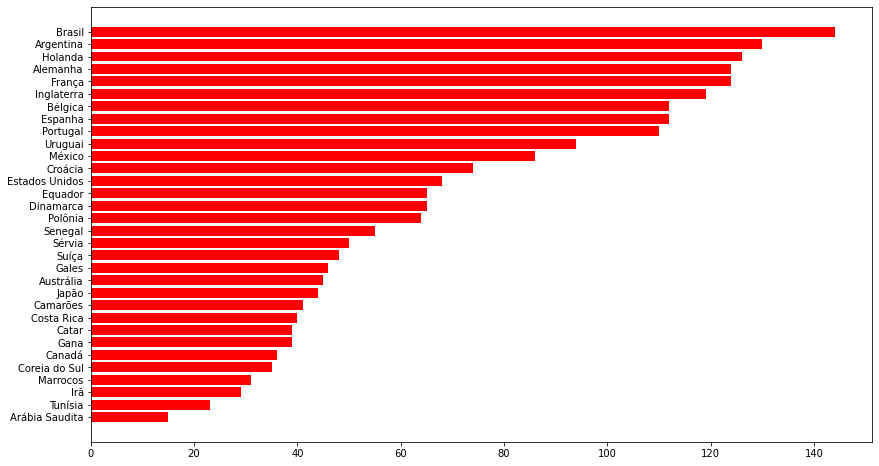

In [ ]:
plt.figure(figsize=(14,8))

plt.barh(y='time', width='soma_placar', data=df_pais.sort_values('soma_placar', ascending=True), color='red');
plt.show()

In [ ]:
df_pais.sort_values('media_placar', ascending=False)

,time,min_placar,max_placar,media_placar,soma_placar
4,Brasil,1,4,2.666667,144
1,Argentina,0,6,2.352827,130
19,Holanda,0,5,2.297271,126
16,França,0,5,2.255361,124
0,Alemanha,0,5,2.253411,124
20,Inglaterra,0,4,2.158869,119
26,Portugal,0,4,2.037037,110
5,Bélgica,0,5,2.035088,112
14,Espanha,0,4,2.035088,112
31,Uruguai,0,5,1.740741,94


In [ ]:
df_palpites_media = df_resumo[['n_jogo', 'time_1', 'time_2', 'media_placar_1', 'media_placar_2']]
df_palpites_media

,n_jogo,time_1,time_2,media_placar_1,media_placar_2
0,1,Catar,Equador,0.789474,1.473684
1,2,Inglaterra,Irã,2.421053,0.315789
2,3,Senegal,Holanda,0.684211,1.947368
3,4,Estados Unidos,Gales,1.421053,0.842105
4,5,Argentina,Arábia Saudita,2.947368,0.000000
5,6,Dinamarca,Tunísia,1.315789,0.526316
6,7,México,Polônia,1.578947,1.105263
7,8,França,Austrália,2.210526,0.578947
8,9,Marrocos,Croácia,0.473684,1.526316
9,10,Alemanha,Japão,2.315789,0.578947
